In [21]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("../res/data.csv")
df.head(5)

,Horodateur,Question sur la nationalité // Question about nationality,Question sur le diplôme d'études secondaires suisse // Question about the high school diploma,"Conséquences - Si les taxes d’études devaient augmenter, devrais-tu travailler à côté des études ? // If tuition fees were to increase, would you need to work alongside your studies?",Niveau d’augmentation - Serais-tu venu·e à l'EPFL si les taxes d'étude étaient 3 fois plus grandes ? // Would you have come to EPFL if tuition fees were 3 times bigger?,Niveau d’augmentation - A partir de quel facteur d’augmentation est-ce qu’une augmentation des taxes d’études aurait un impact sur ton mode de vie ? // From what factor of increase would a rise in tuition fees impact your lifestyle?,Opinion - Est-ce que tu es d'accord avec la proposition de triplement des taxes d'étude pour les étudiant·e·s étranger·ère·s ? // Do you agree with the proposal to triple the tuition fees for international students?,Remarques sur la proposition // Remarks on the proposition,Remarques diverses // Misc remarks
0,29/05/2024 09:54:38,Je n'ai pas la nationalité suisse mais j'ai un...,Je n'ai pas de diplôme suisse mais j'ai un dip...,Oui,3.0,2.0,1.0,NaN,NaN
1,29/05/2024 09:54:42,Je n'ai ni de nationalité suisse ni de nationa...,Je n'ai ni diplôme suisse ni diplôme européen ...,Oui,4.0,1.0,5.0,NaN,NaN
2,29/05/2024 09:54:43,Je n'ai pas la nationalité suisse mais j'ai un...,Je n'ai pas de diplôme suisse mais j'ai un dip...,Oui,1.0,2.0,1.0,NaN,NaN
3,29/05/2024 09:54:51,Je n'ai ni de nationalité suisse ni de nationa...,Je n'ai pas de diplôme suisse mais j'ai un dip...,Oui,5.0,3.0,1.0,NaN,NaN
4,29/05/2024 09:54:57,Je n'ai pas la nationalité suisse mais j'ai un...,Je n'ai pas de diplôme suisse mais j'ai un dip...,Je le fais déjà,1.0,5.0,1.0,NaN,NaN


In [5]:
nationality = "Question sur la nationalité // Question about nationality"
nationality_swiss = "J'ai la nationalité suisse // I have the Swiss nationality"

opinion_str = "Opinion - Est-ce que tu es d'accord avec la proposition de triplement des taxes d'étude pour les étudiant·e·s étranger·ère·s ? // Do you agree with the proposal to triple the tuition fees for international students?"

In [6]:
swiss = 1 * (df[nationality] == nationality_swiss)
opinion = df[opinion_str]

In [12]:
nan_mask = np.isnan(opinion) | np.isnan(swiss)
swiss = swiss[~nan_mask]
opinion = opinion[~nan_mask]

In [13]:
swiss

0      0
1      0
2      0
3      0
4      0
      ..
976    0
977    1
978    0
979    1
980    0
Name: Question sur la nationalité // Question about nationality, Length: 976, dtype: int64

In [14]:
opinion

0      1.0
1      5.0
2      1.0
3      1.0
4      1.0
      ... 
976    1.0
977    1.0
978    1.0
979    1.0
980    1.0
Name: Opinion - Est-ce que tu es d'accord avec la proposition de triplement des taxes d'étude pour les étudiant·e·s étranger·ère·s ? // Do you agree with the proposal to triple the tuition fees for international students?, Length: 976, dtype: float64

In [15]:
stats.pearsonr(opinion, swiss)

PearsonRResult(statistic=0.5078352570214655, pvalue=4.137276607423151e-65)

In [17]:
np.mean(df[opinion_str])

1.716188524590164

In [18]:
np.mean(df[df[nationality] == nationality_swiss][opinion_str])

2.761744966442953

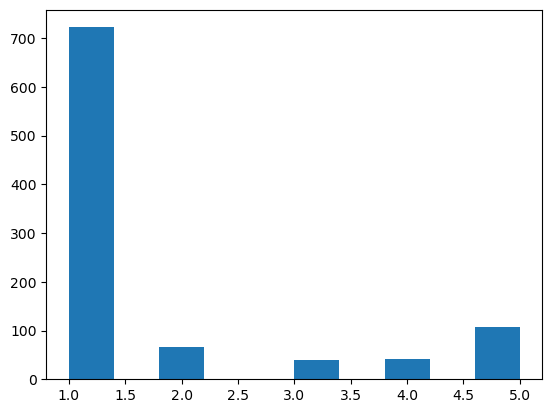

In [25]:
plt.hist(df[opinion_str]);

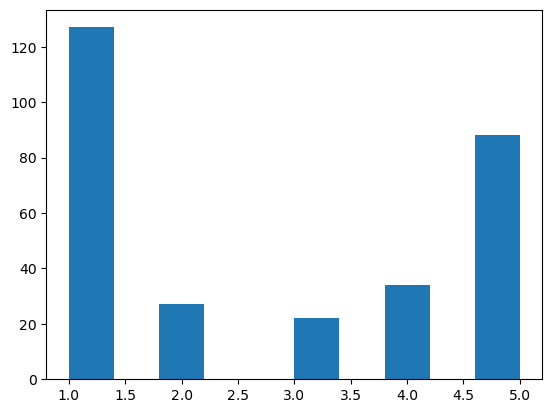

In [26]:
plt.hist(df[df[nationality] == nationality_swiss][opinion_str]);

In [24]:
len(df[df[nationality] == nationality_swiss][opinion_str])

300